In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.0 MB/s 


In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.9 MB/s 


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.7 MB/s 


In [ ]:
import pandas as pd
import re
from unidecode import unidecode
import numpy as np
import scipy

## TEXT CLEANSING

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/train_preprocess.tsv', sep = '\t', names=['sentences', 'stat'])
train_df.head()

,sentences,stat
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
train_df.shape

(11000, 2)

# Dealing with duplicates

In [ ]:
#Total of duplications
train_df.duplicated().sum()

67

In [ ]:
#Locating duplicates
train_df.loc[train_df.duplicated(), :]

,sentences,stat
948,berantakan,negative
1205,jangan pernah kecewa dengan apa yang diberikan...,positive
1367,bersyukur,positive
2616,apresiasi,positive
2708,tidak berantakan,positive
...,...,...
10927,tidak indah,negative
10950,bank bca di pgc payah sekali pelayanan nya . j...,negative
10979,berkesempatan menikmati santap pagi dikarenaka...,positive
10995,tidak kecewa,positive


In [ ]:
#Checking duplicate sample
train_df[train_df['sentences'] == 'tidak indah']

,sentences,stat
10815,tidak indah,negative
10927,tidak indah,negative


In [ ]:
#Deleting duplicates
train_df = train_df.drop_duplicates(keep='last')
train_df.head()

,sentences,stat
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


# Punctuations, newlines, multi-spaces deletion

In [ ]:
#Wipe out punctuations
def remove_punctuation(s):
    s = re.sub(r"\\x[A-Za-z0-9./]+", '', unidecode(s))
    return re.sub(r"[^\w\d\s]+","",s)

train_df['sentences_1'] = train_df['sentences'].apply(remove_punctuation)
train_df.head() 

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih...


In [ ]:
#Wipe out new line
def remove_newline(s):
    return s.strip().replace(r'\n'," ")
    
train_df['sentences_1'] = train_df['sentences_1'].apply(remove_newline)
train_df.head()

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih...


In [ ]:
#Wipe out multi-spaces
def remove_spaces(s):
    return  re.sub(' +', ' ',s)
    
train_df['sentences_1'] = train_df['sentences_1'].apply(remove_spaces)
train_df.head()

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Wipe out Indonesian stopwords -> sw stopwords
## sw_id = pd.read_csv (r'id_stopwords.txt')
## sw_id.to_csv (r'id_stopwords.csv', index=None)
def stopwords_remove(s):
    sw_id = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Dataset/id_stopwords.csv', names=['sw'])
    list_sw = sw_id['sw'].to_list()
    s = s.split(" ") # merubah string menjadi list
    s = [x for x in s if x not in list_sw] # menghapus kata pada s, jika kata tersebut ada pada list_sw
    s = ' '.join(s) # menggabung list menjadi string, dipisah oleh spasi
    return s

train_df['sentences_1'] = train_df['sentences_1'].apply(stopwords_remove)
train_df.head()

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh mahasiswa sombong kasih kartu kuning belaj...


In [ ]:
# Stemming -> turns words into it's origin
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def indo_stemming(s):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(s)

train_df['sentences_1'] = train_df['sentences_1'].apply(indo_stemming)
train_df.head()

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai diw...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh mahasiswa sombong kasih kartu kuning ajar ...


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving new_kamusalay.csv to new_kamusalay.csv


In [ ]:
kamus = pd.read_csv('/content/new_kamusalay.csv', names = ['sebelum', 'sesudah'], encoding='latin-1')
kamus

,sebelum,sesudah
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15171,mendikbud,menteri pendidikan dan kebudayaan
15172,mendag,menteri perdagangan
15173,menaker,menteri tenaga kerja
15174,memetwit,mentwit


In [ ]:
number = 0

In [ ]:
# Words normalization -> turns words into a normal condition
def _normalization(s):
  global number
  words = s.split()
  clear_words = ""
  for val in words:
    x = 0
    for idx, data in enumerate(kamus['sebelum']):
      if(val == data):
        clear_words += kamus['sesudah'][idx] + ' '
        print(number,"Transform :",data,"-",kamus['sesudah'][idx])
        x = 1
        number += 1
        break
    if(x == 0):
      clear_words += val + ' '
  return clear_words

train_df['sentences_1'] = train_df['sentences_1'].apply(_normalization)
train_df

Streaming output truncated to the last 5000 lines.
1343 Transform : mah - adalah
1344 Transform : nang - di
1345 Transform : bwa - bawa
1346 Transform : warteg - warung tegal
1347 Transform : nonton - menonton
1348 Transform : wib - waktu indonesia bagian barat
1349 Transform : dholim - zalim
1350 Transform : dalem - dalam
1351 Transform : nang - di
1352 Transform : pki - partai komunis indonesia
1353 Transform : tni - tentara nasional indonesia
1354 Transform : s - si
1355 Transform : dah - sudah
1356 Transform : antri - antre
1357 Transform : pre - pra
1358 Transform : ramadhan - ramadan
1359 Transform : asik - asyik
1360 Transform : cemilan - camilan
1361 Transform : group - grup
1362 Transform : pilkada - pilihan kepala daerah
1363 Transform : indonesian - indonesia
1364 Transform : selfie - swafoto
1365 Transform : gitu - begitu
1366 Transform : asik - asyik
1367 Transform : sby - susilo bambang yudhoyono
1368 Transform : ampe - sampai
1369 Transform : poko - pokok
1370 Transform 

,sentences,stat,sentences_1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung milik usaha pabrik puluh kenal putih ba...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 memberi hujjah partai d...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nya nya...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning ajar...
...,...,...,...
10995,tidak kecewa,positive,kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak masakan nya kepiting senang pilih kepitin...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormat partaipartai koalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi tol pasteur macet parah bikin jengkel


In [ ]:
train_df = train_df.drop('sentences', axis=1)
train_df = train_df[['sentences_1','stat']]
train_df.head()

,sentences_1,stat
0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus k212 memberi hujjah partai d...,neutral
2,lokasi strategis jalan sumatra bandung nya nya...,positive
3,betapa bahagia nya unboxing paket barang nya b...,positive
4,aduh mahasiswa sombong kasih kartu kuning ajar...,negative


In [ ]:
# Counting words in every row
def split_kalimat(text):
  return (len(text.split()))

train_df['total_kata'] = train_df['sentences_1'].apply(split_kalimat)
train_df.head()

,sentences_1,stat,total_kata
0,warung milik usaha pabrik puluh kenal putih ba...,positive,32
1,mohon ulama lurus k212 memberi hujjah partai d...,neutral,11
2,lokasi strategis jalan sumatra bandung nya nya...,positive,21
3,betapa bahagia nya unboxing paket barang nya b...,positive,10
4,aduh mahasiswa sombong kasih kartu kuning ajar...,negative,17


In [ ]:
def remove_nya(text):
  return re.sub('nya', '', text)

train_df['sentences_1'] = train_df['sentences_1'].apply(remove_nya)
train_df.head()

,sentences_1,stat,total_kata
0,warung milik usaha pabrik puluh kenal putih ba...,positive,32
1,mohon ulama lurus k212 memberi hujjah partai d...,neutral,11
2,lokasi strategis jalan sumatra bandung man so...,positive,21
3,betapa bahagia unboxing paket barang bagus t...,positive,10
4,aduh mahasiswa sombong kasih kartu kuning ajar...,negative,17


In [ ]:
# Deleting reviews with 0 word
train_df2 = train_df.loc[(train_df["total_kata"] != 0)]
train_df2.head() 

,sentences_1,stat,total_kata,sum_category
0,warung milik usaha pabrik puluh kenal putih ba...,positive,32,31-40
1,mohon ulama lurus k212 memberi hujjah partai d...,neutral,11,11-20
2,lokasi strategis jalan sumatra bandung man so...,positive,21,21-30
3,betapa bahagia unboxing paket barang bagus t...,positive,10,0-10
4,aduh mahasiswa sombong kasih kartu kuning ajar...,negative,17,11-20


In [ ]:
train_df2.shape

(10926, 4)

## Analisis Kata Positif


In [ ]:
abusive = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/abusive.csv")
abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [ ]:
abusive.shape

(125, 1)

In [ ]:
train_df_pos = train_df.loc[(train_df["stat"] == "positive")]
train_df_pos.head() 

,sentences_1,stat,total_kata,sum_category
0,warung milik usaha pabrik puluh kenal putih ba...,positive,32,31-40
2,lokasi strategis jalan sumatra bandung man so...,positive,21,21-30
3,betapa bahagia unboxing paket barang bagus t...,positive,10,0-10
5,makan agam harga makan food stall 10 kasir sua...,positive,13,11-20
7,unik bagus foto makan enak pegawai ramah bersi...,positive,25,21-30


In [ ]:
train_df_pos.shape

(6383, 4)

In [ ]:
word_freq_pos = train_df_pos['sentences_1'].str.split(expand=True).stack().value_counts()
word_freq_pos = pd.DataFrame(word_freq_pos)
word_freq_pos

,0
makan,5732
enak,3368
harga,1716
bandung,1635
menu,1544
...,...
each,1
seratus,1
person,1
minimarket,1


In [ ]:
word_freq_pos.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq_pos.csv', index=True)

In [ ]:
word_freq_pos2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq_pos.csv")
wfp = word_freq_pos2.head(10)
wfp

,kata,jumlah
0,makan,5732.0
1,enak,3368.0
2,harga,1716.0
3,bandung,1635.0
4,menu,1544.0
5,banget,1201.0
6,restoran,1144.0
7,suasana,933.0
8,pilih,925.0
9,layan,919.0


In [ ]:
df_merge_pos = pd.merge(
    left=wfp,
    right=abusive,
    left_on='kata',
    right_on='ABUSIVE',
    how='left'
)
pos_df = df_merge_pos[df_merge_pos['ABUSIVE'].notnull()]
pos_df = pos_df.drop(['ABUSIVE'], axis=1)

In [ ]:
pos_df

,kata,jumlah


## EXPLORATORY DATA ANALYSIS




In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df2.groupby(["stat"])['sentences_1'].count()

stat
negative    3408
neutral     1138
positive    6380
Name: sentences_1, dtype: int64

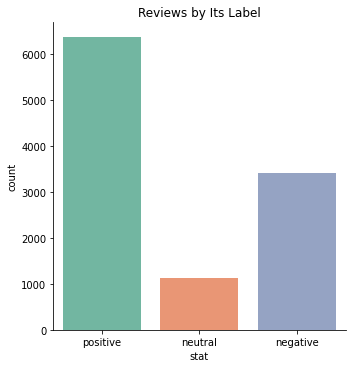

In [ ]:
# Plotting data based on their label/status (positive, neutral, negative)
sns.catplot(data=train_df2, x="stat", kind="count", palette="Set2").set(title='Reviews by Its Label')

# untuk mengetahui jumlah masing-masing

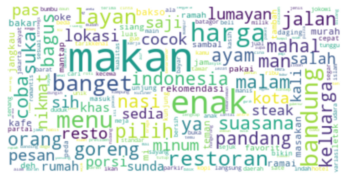

In [ ]:
# Wordcloud distinct words -> using collocation
text = ' '.join(train_df['sentences_1']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(collocations=False, max_font_size=50, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bicubic")
plt.axis('off')
plt.show()

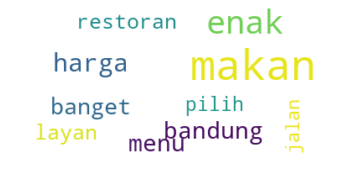

In [ ]:
# Wordcloud distinct words -> using collocation
text = ' '.join(train_df['sentences_1']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(collocations=False, max_font_size=50, max_words=10, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Counting Word Frequency to count what words written the most 

In [ ]:
word_freq = train_df['sentences_1'].str.split(expand=True).stack().value_counts()
word_freq = pd.DataFrame(word_freq)
word_freq.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq.csv', index=True)
# CSV file downloaded and edited to give column name

In [ ]:
word_freq = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/word_freq2.csv")
wf = word_freq.head(10)
wf

,kata,jumlah
0,makan,6466.0
1,enak,3630.0
2,harga,2015.0
3,bandung,1750.0
4,menu,1689.0
5,banget,1521.0
6,restoran,1278.0
7,layan,1264.0
8,pilih,1094.0
9,jalan,1019.0


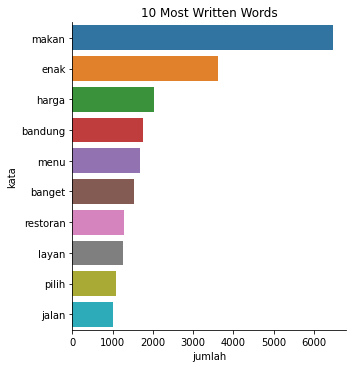

In [ ]:
sns.catplot(data=wf, x="jumlah", y="kata", kind="bar").set(title='10 Most Written Words')

Counting the most written abusive words

Merging dataframe of abusive words and word frequency to know the what abusive words that are used in the data set and the frequency of those words

In [ ]:
df_merge = pd.merge(
    left=word_freq,
    right=abusive,
    left_on='kata',
    right_on='ABUSIVE',
    how='left'
)
filtered_df = df_merge[df_merge['ABUSIVE'].notnull()]
filtered_df = filtered_df.drop(['ABUSIVE'], axis=1)

In [ ]:
filtered_df

,kata,jumlah
203,babi,147.0
289,sarap,104.0
309,anjing,98.0
448,gila,68.0
477,komunis,63.0
...,...,...
9651,perek,1.0
10387,jancuk,1.0
10621,kontol,1.0
12614,titit,1.0


In [ ]:
abusive10 = filtered_df.head(10)
abusive10

,kata,jumlah
203,babi,147.0
289,sarap,104.0
309,anjing,98.0
448,gila,68.0
477,komunis,63.0
497,goblok,61.0
569,bodoh,53.0
667,sampah,45.0
719,tolol,41.0
770,lgbt,38.0


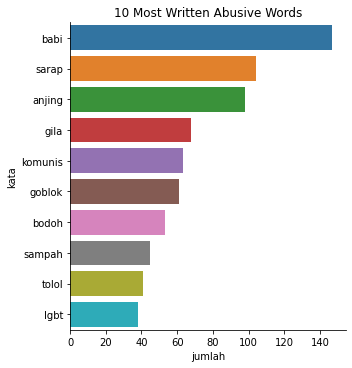

In [ ]:
sns.catplot(data=abusive10, x="jumlah", y="kata", kind="bar").set(title='10 Most Written Abusive Words')

In [ ]:
# Categorize total_kata into 5 classes
def func(x):
    if 0 < x <= 10:
        return '0-10'
    elif 10 < x <= 20:
        return '11-20'
    elif 20 < x <= 30:
        return '21-30'
    elif 30 < x <= 40:
        return '31-40'        
    return '>40'

train_df['sum_category'] = train_df['total_kata'].apply(func)
train_df.head()

,sentences_1,stat,total_kata,sum_category
0,warung milik usaha pabrik puluh kenal putih ba...,positive,32,31-40
1,mohon ulama lurus k212 memberi hujjah partai d...,neutral,11,11-20
2,lokasi strategis jalan sumatra bandung man so...,positive,21,21-30
3,betapa bahagia unboxing paket barang bagus t...,positive,10,0-10
4,aduh mahasiswa sombong kasih kartu kuning ajar...,negative,17,11-20


In [ ]:
sns.catplot(data=train_df2, x="sum_category", kind="count", palette="Set2").set(title='Reviews by Total Words Category')

ValueError: ignored

In [ ]:
sns.catplot(
    data=train_df2, x="total_kata", y="stat",
    kind="box", dodge=False,
).set(title='Distributions Based on Labels')